In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
path_backgrounds = "FITS-SingleFrames/single_extension/"
path_backgrounds_without_pedestal = "FITS-SingleFrames/single_extension_without_pedestal/"

In [3]:
if not os.path.exists(path_backgrounds_without_pedestal):
    os.makedirs(path_backgrounds_without_pedestal)

In [4]:
path_background_vis_1 = path_backgrounds + "imageV1.fits"
path_background_vis_2 = path_backgrounds + "imageV2.fits"
path_background_nisp_y = path_backgrounds + "imageY.fits"
path_background_nisp_j = path_backgrounds + "imageJ.fits"
path_background_nisp_h = path_backgrounds + "imageH.fits"

In [5]:
path_background_vis_1_without_pedestal = path_backgrounds_without_pedestal + "imageV1.fits"
path_background_vis_2_without_pedestal = path_backgrounds_without_pedestal + "imageV2.fits"
path_background_nisp_y_without_pedestal = path_backgrounds_without_pedestal + "imageY.fits"
path_background_nisp_j_without_pedestal = path_backgrounds_without_pedestal + "imageJ.fits"
path_background_nisp_h_without_pedestal = path_backgrounds_without_pedestal + "imageH.fits"

## VIS 1

-56.833424
7393205.0
4216.4404
136570.17


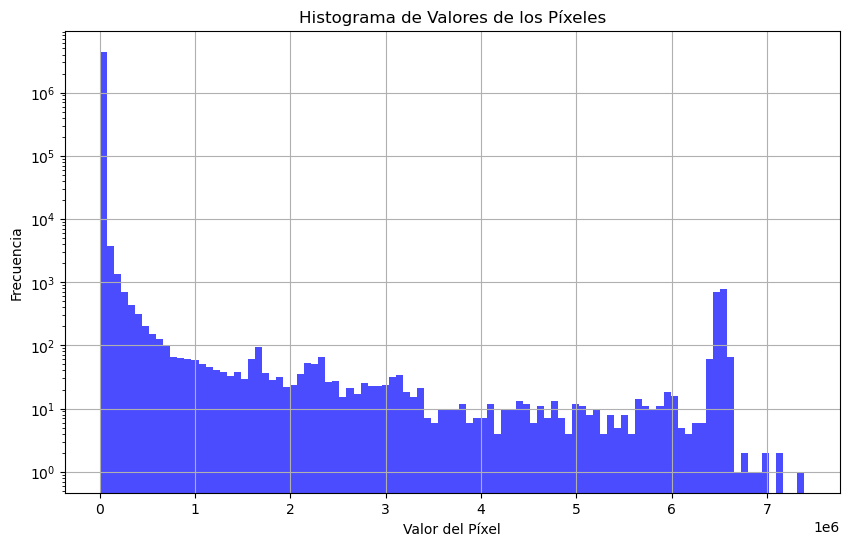

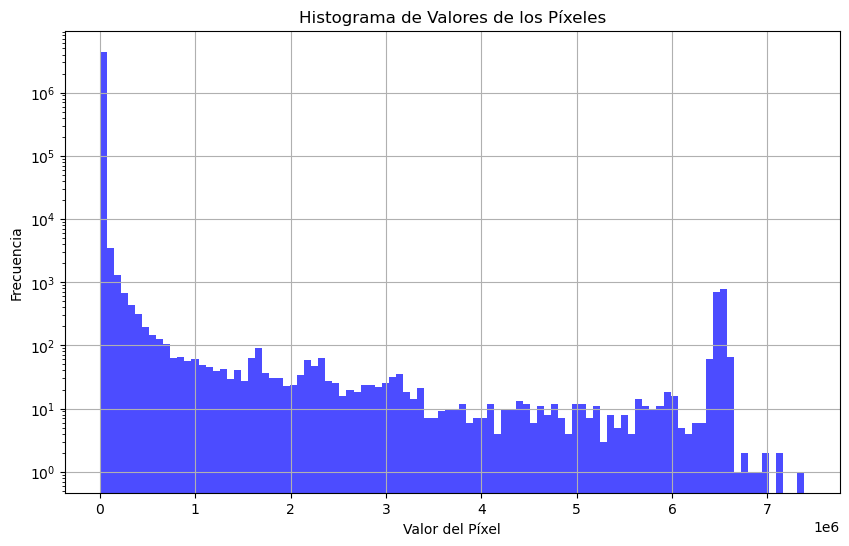

In [6]:
# Abrir el archivo FITS original
hdu_list = fits.open(path_background_vis_1)
image_data = hdu_list[0].data
header = hdu_list[0].header  # Copiar la cabecera
hdu_list.close()

# Calcular la media y la desviación estándar de toda la imagen
mean_background = np.median(image_data)
std_background = np.std(image_data)
min_val = np.min(image_data)
print(min_val)
max_val = np.max(image_data)
print(max_val)

print(mean_background)
print(std_background)

# Mostrar el histograma de los valores de los píxeles
plt.figure(figsize=(10, 6))
plt.hist(image_data.flatten(), bins=100, color='blue', alpha=0.7)
plt.title('Histograma de Valores de los Píxeles')
plt.xlabel('Valor del Píxel')
plt.ylabel('Frecuencia')
plt.yscale('log')  # Usar escala logarítmica para mejor visualización
plt.grid(True)
plt.show()

# Sustraer el ruido de fondo de la imagen completa
image_data_subtracted = image_data - mean_background
# Ajustar los valores negativos a 0
image_data_subtracted = np.maximum(image_data_subtracted, 1e-10)
# Guardar la imagen con el ruido sustraído y la cabecera original
fits.writeto(path_background_vis_1_without_pedestal, image_data_subtracted, header=header, overwrite=True)

# Mostrar el histograma de los valores de los píxeles
plt.figure(figsize=(10, 6))
plt.hist(image_data_subtracted.flatten(), bins=100, color='blue', alpha=0.7)
plt.title('Histograma de Valores de los Píxeles')
plt.xlabel('Valor del Píxel')
plt.ylabel('Frecuencia')
plt.yscale('log')  # Usar escala logarítmica para mejor visualización
plt.grid(True)
plt.show()

## VIS 2

-54.485687
7695438.0
4094.5476
62131.49


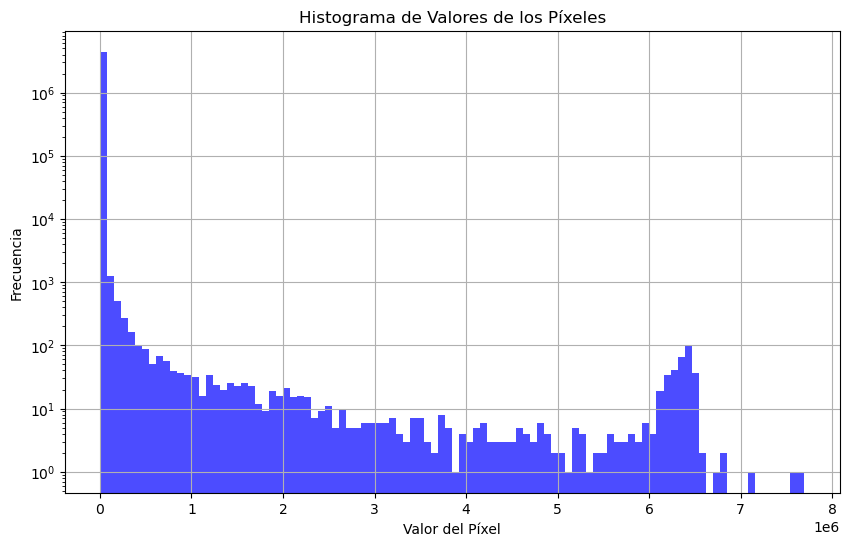

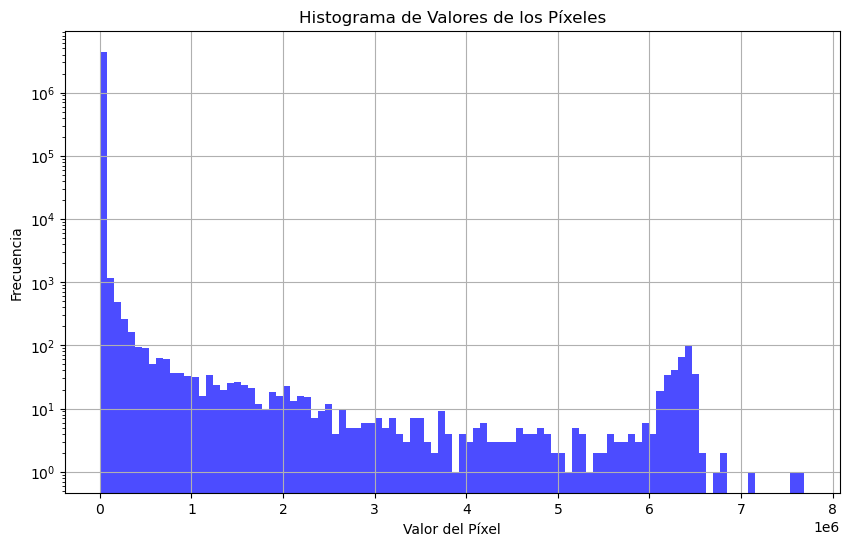

In [7]:
# Abrir el archivo FITS original
hdu_list = fits.open(path_background_vis_2)
image_data = hdu_list[0].data
header = hdu_list[0].header  # Copiar la cabecera
hdu_list.close()

# Calcular la mediana y la desviación estándar de toda la imagen
mean_background = np.median(image_data)
std_background = np.std(image_data)
min_val = np.min(image_data)
print(min_val)
max_val = np.max(image_data)
print(max_val)

print(mean_background)
print(std_background)

# Mostrar el histograma de los valores de los píxeles
plt.figure(figsize=(10, 6))
plt.hist(image_data.flatten(), bins=100, color='blue', alpha=0.7)
plt.title('Histograma de Valores de los Píxeles')
plt.xlabel('Valor del Píxel')
plt.ylabel('Frecuencia')
plt.yscale('log')  # Usar escala logarítmica para mejor visualización
plt.grid(True)
plt.show()

# Sustraer el ruido de fondo de la imagen completa
image_data_subtracted = image_data - mean_background
# Ajustar los valores negativos a 0
image_data_subtracted = np.maximum(image_data_subtracted, 1e-10)
# Guardar la imagen con el ruido sustraído y la cabecera original
fits.writeto(path_background_vis_1_without_pedestal, image_data_subtracted, header=header, overwrite=True)

# Mostrar el histograma de los valores de los píxeles
plt.figure(figsize=(10, 6))
plt.hist(image_data_subtracted.flatten(), bins=100, color='blue', alpha=0.7)
plt.title('Histograma de Valores de los Píxeles')
plt.xlabel('Valor del Píxel')
plt.ylabel('Frecuencia')
plt.yscale('log')  # Usar escala logarítmica para mejor visualización
plt.grid(True)
plt.show()

In [8]:
## NISP H

-45450.03
117122.08
59.57294
946.72375


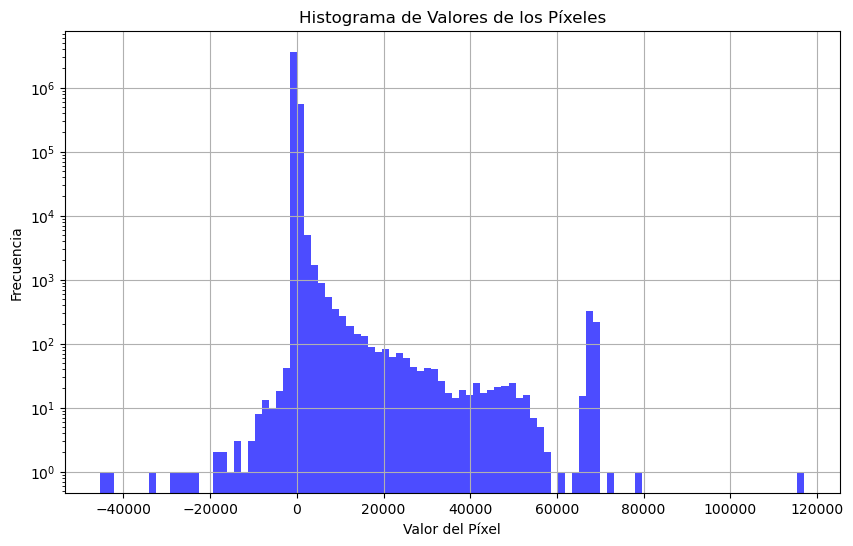

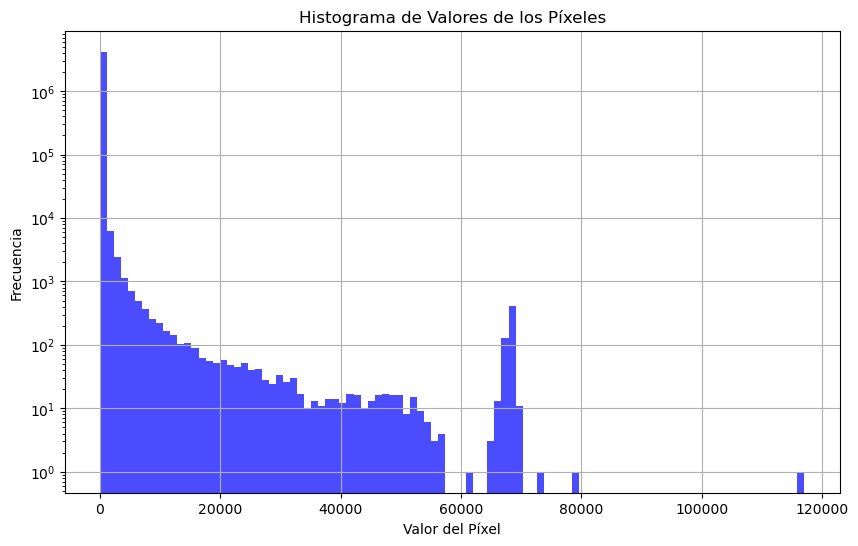

In [9]:
# Abrir el archivo FITS original
hdu_list = fits.open(path_background_nisp_h)
image_data = hdu_list[0].data
header = hdu_list[0].header  # Copiar la cabecera
hdu_list.close()

# Calcular la media y la desviación estándar de toda la imagen
mean_background = np.median(image_data)
std_background = np.std(image_data)
min_val = np.min(image_data)
print(min_val)
max_val = np.max(image_data)
print(max_val)

print(mean_background)
print(std_background)

# Mostrar el histograma de los valores de los píxeles
plt.figure(figsize=(10, 6))
plt.hist(image_data.flatten(), bins=100, color='blue', alpha=0.7)
plt.title('Histograma de Valores de los Píxeles')
plt.xlabel('Valor del Píxel')
plt.ylabel('Frecuencia')
plt.yscale('log')  # Usar escala logarítmica para mejor visualización
plt.grid(True)
plt.show()

# Sustraer el ruido de fondo de la imagen completa
image_data_subtracted = image_data - mean_background
# Ajustar los valores negativos a 0
image_data_subtracted = np.maximum(image_data_subtracted, 1e-10)
# Guardar la imagen con el ruido sustraído y la cabecera original
fits.writeto(path_background_vis_1_without_pedestal, image_data_subtracted, header=header, overwrite=True)

# Mostrar el histograma de los valores de los píxeles
plt.figure(figsize=(10, 6))
plt.hist(image_data_subtracted.flatten(), bins=100, color='blue', alpha=0.7)
plt.title('Histograma de Valores de los Píxeles')
plt.xlabel('Valor del Píxel')
plt.ylabel('Frecuencia')
plt.yscale('log')  # Usar escala logarítmica para mejor visualización
plt.grid(True)
plt.show()

## NISP J

-280103.5
187600.42
69.0512
994.5486


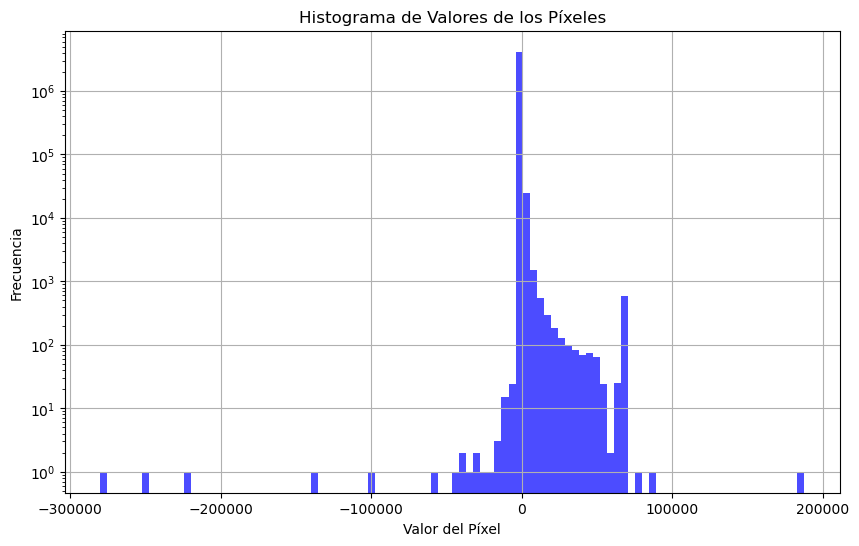

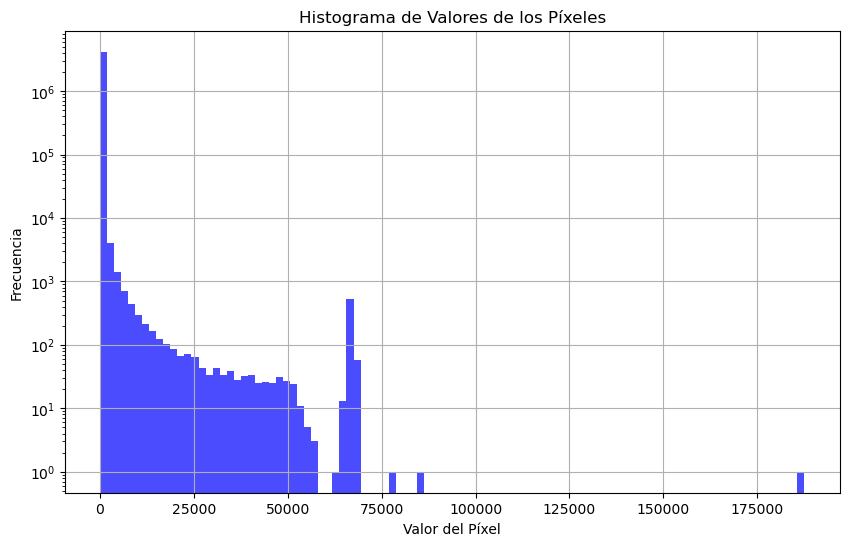

In [10]:
# Abrir el archivo FITS original
hdu_list = fits.open(path_background_nisp_j)
image_data = hdu_list[0].data
header = hdu_list[0].header  # Copiar la cabecera
hdu_list.close()

# Calcular la media y la desviación estándar de toda la imagen
mean_background = np.median(image_data)
std_background = np.std(image_data)
min_val = np.min(image_data)
print(min_val)
max_val = np.max(image_data)
print(max_val)

print(mean_background)
print(std_background)

# Mostrar el histograma de los valores de los píxeles
plt.figure(figsize=(10, 6))
plt.hist(image_data.flatten(), bins=100, color='blue', alpha=0.7)
plt.title('Histograma de Valores de los Píxeles')
plt.xlabel('Valor del Píxel')
plt.ylabel('Frecuencia')
plt.yscale('log')  # Usar escala logarítmica para mejor visualización
plt.grid(True)
plt.show()

# Sustraer el ruido de fondo de la imagen completa
image_data_subtracted = image_data - mean_background
# Ajustar los valores negativos a 0
image_data_subtracted = np.maximum(image_data_subtracted, 1e-10)
# Guardar la imagen con el ruido sustraído y la cabecera original
fits.writeto(path_background_vis_1_without_pedestal, image_data_subtracted, header=header, overwrite=True)

# Mostrar el histograma de los valores de los píxeles
plt.figure(figsize=(10, 6))
plt.hist(image_data_subtracted.flatten(), bins=100, color='blue', alpha=0.7)
plt.title('Histograma de Valores de los Píxeles')
plt.xlabel('Valor del Píxel')
plt.ylabel('Frecuencia')
plt.yscale('log')  # Usar escala logarítmica para mejor visualización
plt.grid(True)
plt.show()

## NISP Y

-1823052.0
14566712.0
56.628407
7226.166


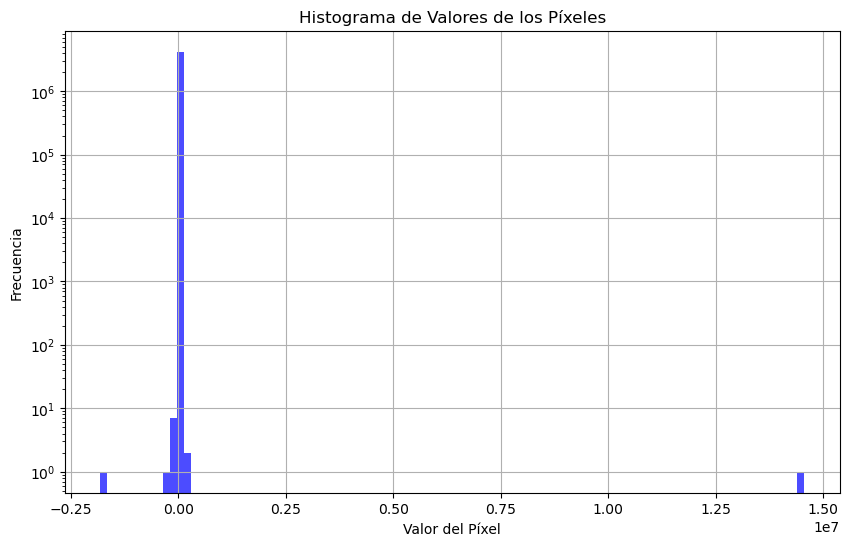

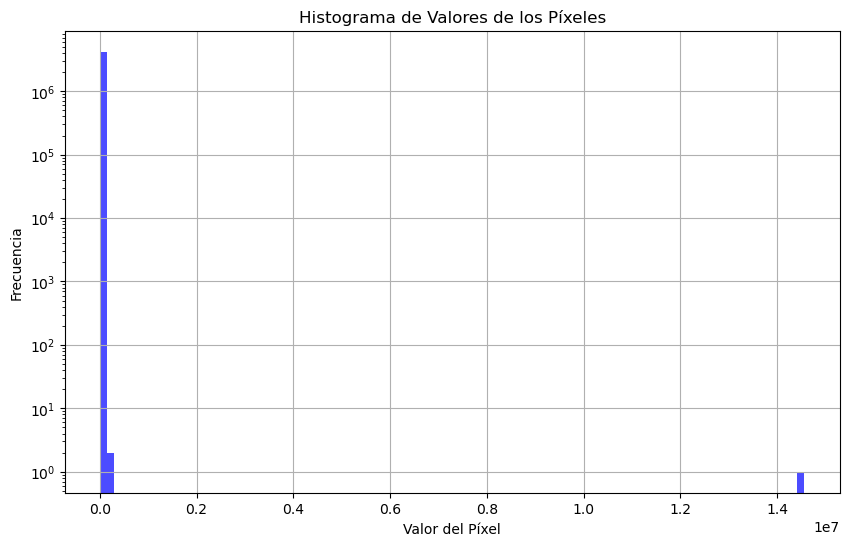

In [11]:
# Abrir el archivo FITS original
hdu_list = fits.open(path_background_nisp_y)
image_data = hdu_list[0].data
header = hdu_list[0].header  # Copiar la cabecera
hdu_list.close()

# Calcular la media y la desviación estándar de toda la imagen
mean_background = np.median(image_data)
std_background = np.std(image_data)
min_val = np.min(image_data)
print(min_val)
max_val = np.max(image_data)
print(max_val)

print(mean_background)
print(std_background)

# Mostrar el histograma de los valores de los píxeles
plt.figure(figsize=(10, 6))
plt.hist(image_data.flatten(), bins=100, color='blue', alpha=0.7)
plt.title('Histograma de Valores de los Píxeles')
plt.xlabel('Valor del Píxel')
plt.ylabel('Frecuencia')
plt.yscale('log')  # Usar escala logarítmica para mejor visualización
plt.grid(True)
plt.show()

# Sustraer el ruido de fondo de la imagen completa
image_data_subtracted = image_data - mean_background
# Ajustar los valores negativos a 0
image_data_subtracted = np.maximum(image_data_subtracted, 1e-10)
# Guardar la imagen con el ruido sustraído y la cabecera original
fits.writeto(path_background_vis_1_without_pedestal, image_data_subtracted, header=header, overwrite=True)

# Mostrar el histograma de los valores de los píxeles
plt.figure(figsize=(10, 6))
plt.hist(image_data_subtracted.flatten(), bins=100, color='blue', alpha=0.7)
plt.title('Histograma de Valores de los Píxeles')
plt.xlabel('Valor del Píxel')
plt.ylabel('Frecuencia')
plt.yscale('log')  # Usar escala logarítmica para mejor visualización
plt.grid(True)
plt.show()